https://medium.com/@ottaviocalzone/an-intuitive-explanation-of-lstm-a035eb6ab42c

https://www.youtube.com/watch?v=YCzL96nL7j0


         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


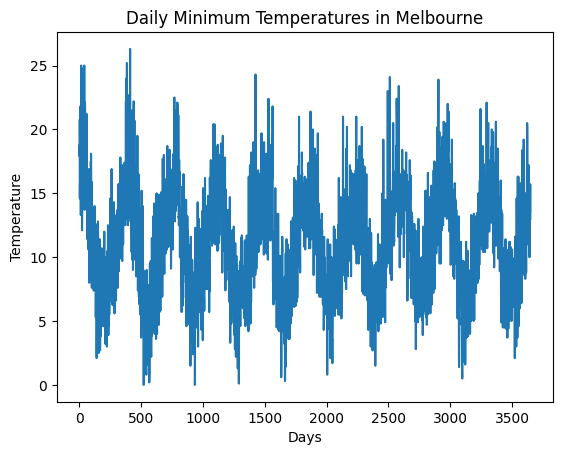

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
print(df.head())

# Plot the temperature data
df['Temp'].plot(title='Daily Minimum Temperatures in Melbourne')
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.show()



In [3]:
df.shape

(3650, 2)

In [4]:
df.sample(5)

,Date,Temp
1198,1984-04-13,11.1
2580,1988-01-26,12.6
3382,1990-04-08,15.2
3630,1990-12-12,14.0
1473,1985-01-14,19.7


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Data scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Temp'].values.reshape(-1,1))

# Convert to supervised learning problem
def to_supervised(data, n_input, n_out=1):
    X, y = [], []
    for i in range(len(data) - n_input - n_out + 1):
        X.append(data[i:(i+n_input), 0])
        y.append(data[(i+n_input):(i+n_input+n_out), 0])
    return np.array(X), np.array(y)

n_input = 5
X, y = to_supervised(scaled_data, n_input)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [6]:
X

array([[[0.78707224],
        [0.68060837],
        [0.7148289 ],
        [0.55513308],
        [0.60076046]],

       [[0.68060837],
        [0.7148289 ],
        [0.55513308],
        [0.60076046],
        [0.60076046]],

       [[0.7148289 ],
        [0.55513308],
        [0.60076046],
        [0.60076046],
        [0.60076046]],

       ...,

       [[0.38022814],
        [0.4904943 ],
        [0.55513308],
        [0.53231939],
        [0.51711027]],

       [[0.4904943 ],
        [0.55513308],
        [0.53231939],
        [0.51711027],
        [0.51330798]],

       [[0.55513308],
        [0.53231939],
        [0.51711027],
        [0.51330798],
        [0.59695817]]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_input, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/50
92/92 - 3s - 28ms/step - loss: 0.0493 - val_loss: 0.0112
Epoch 2/50
92/92 - 0s - 5ms/step - loss: 0.0120 - val_loss: 0.0101
Epoch 3/50
92/92 - 1s - 7ms/step - loss: 0.0115 - val_loss: 0.0096
Epoch 4/50
92/92 - 1s - 6ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 5/50
92/92 - 0s - 5ms/step - loss: 0.0110 - val_loss: 0.0092
Epoch 6/50
92/92 - 1s - 7ms/step - loss: 0.0107 - val_loss: 0.0088
Epoch 7/50
92/92 - 1s - 6ms/step - loss: 0.0105 - val_loss: 0.0085
Epoch 8/50
92/92 - 1s - 7ms/step - loss: 0.0102 - val_loss: 0.0086
Epoch 9/50
92/92 - 1s - 7ms/step - loss: 0.0099 - val_loss: 0.0081
Epoch 10/50
92/92 - 1s - 7ms/step - loss: 0.0096 - val_loss: 0.0079
Epoch 11/50
92/92 - 1s - 7ms/step - loss: 0.0094 - val_loss: 0.0077
Epoch 12/50
92/92 - 1s - 7ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 13/50
92/92 - 0s - 4ms/step - loss: 0.0093 - val_loss: 0.0080
Epoch 14/50
92/92 - 1s - 7ms/step - loss: 0.0094 - val_loss: 0.0075
Epoch 15/50
92/92 - 1s - 6ms/step - loss: 0.0092 - val_l

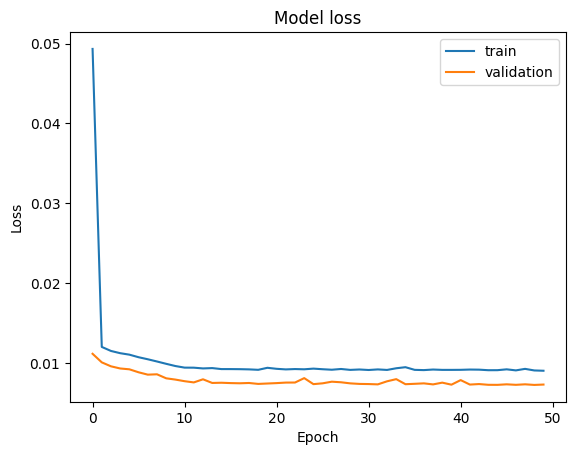

In [ ]:
# Plot the training loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Airline Passengers

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [14]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')



In [16]:
dataframe

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [52]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [35]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [53]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)



In [54]:
# Reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [59]:
trainX.shape[0], 1, trainX.shape[1]

(90, 1, 1)

In [56]:
testX.shape[0], 1, testX.shape[1]

(42, 1, 1)

In [42]:
print("Shape of training set: {}". format(trainX.shape))
print("Shape of test set: {}". format(testX.shape))

Shape of training set: (90, 1, 5)
Shape of test set: (42, 1, 5)


In [44]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(None, look_back)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
90/90 - 2s - 23ms/step - loss: 0.0105
Epoch 2/100
90/90 - 0s - 4ms/step - loss: 0.0053
Epoch 3/100
90/90 - 0s - 2ms/step - loss: 0.0042
Epoch 4/100
90/90 - 0s - 2ms/step - loss: 0.0042
Epoch 5/100
90/90 - 0s - 3ms/step - loss: 0.0037
Epoch 6/100
90/90 - 0s - 3ms/step - loss: 0.0033
Epoch 7/100
90/90 - 0s - 4ms/step - loss: 0.0037
Epoch 8/100
90/90 - 0s - 2ms/step - loss: 0.0029
Epoch 9/100
90/90 - 0s - 3ms/step - loss: 0.0028
Epoch 10/100
90/90 - 0s - 2ms/step - loss: 0.0027
Epoch 11/100
90/90 - 0s - 2ms/step - loss: 0.0026
Epoch 12/100
90/90 - 0s - 3ms/step - loss: 0.0025
Epoch 13/100
90/90 - 0s - 3ms/step - loss: 0.0023
Epoch 14/100
90/90 - 0s - 2ms/step - loss: 0.0023
Epoch 15/100
90/90 - 0s - 3ms/step - loss: 0.0023
Epoch 16/100
90/90 - 0s - 3ms/step - loss: 0.0026
Epoch 17/100
90/90 - 0s - 2ms/step - loss: 0.0026
Epoch 18/100
90/90 - 0s - 3ms/step - loss: 0.0025
Epoch 19/100
90/90 - 0s - 2ms/step - loss: 0.0023
Epoch 20/100
90/90 - 0s - 4ms/step - loss: 0.0022
Epoch 21

In [46]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [47]:
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(f'Test Score: {testScore:.2f} RMSE')


Train Score: 0.04 RMSE
Test Score: 0.09 RMSE


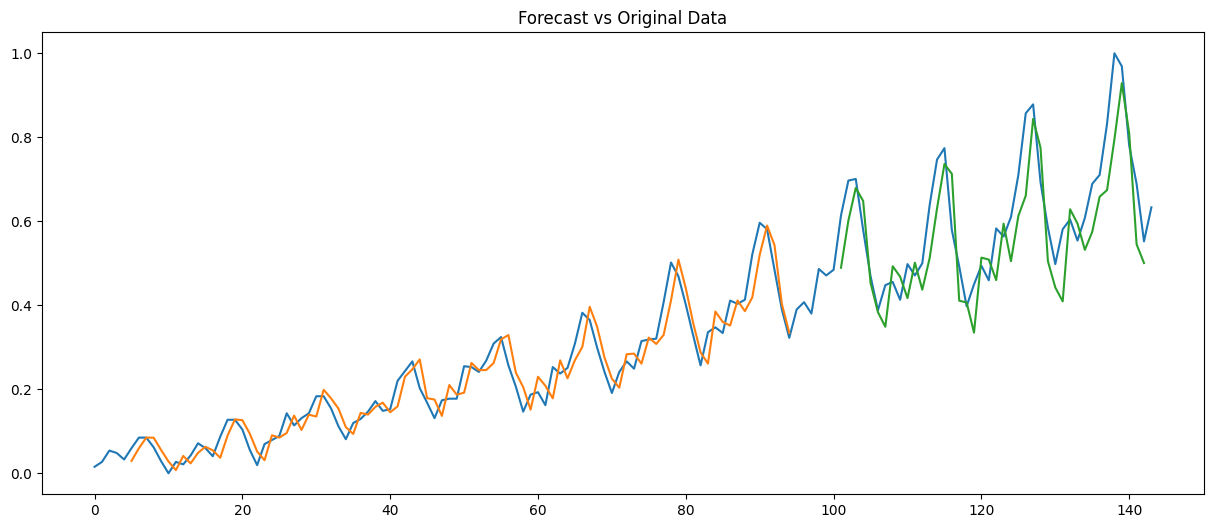

In [48]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Forecast vs Original Data')
plt.show()


In [61]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, look_back)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, None, 50)            │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,065 (129.16 KB)

 Trainable params: 33,065 (129.16 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
90/90 - 3s - 35ms/step - loss: 0.0242
Epoch 2/100
90/90 - 0s - 3ms/step - loss: 0.0118
Epoch 3/100
90/90 - 0s - 3ms/step - loss: 0.0059
Epoch 4/100
90/90 - 0s - 3ms/step - loss: 0.0047
Epoch 5/100
90/90 - 0s - 3ms/step - loss: 0.0054
Epoch 6/100
90/90 - 0s - 3ms/step - loss: 0.0050
Epoch 7/100
90/90 - 0s - 3ms/step - loss: 0.0046
Epoch 8/100
90/90 - 0s - 3ms/step - loss: 0.0038
Epoch 9/100
90/90 - 0s - 3ms/step - loss: 0.0038
Epoch 10/100
90/90 - 0s - 3ms/step - loss: 0.0034
Epoch 11/100
90/90 - 0s - 3ms/step - loss: 0.0034
Epoch 12/100
90/90 - 0s - 3ms/step - loss: 0.0033
Epoch 13/100
90/90 - 0s - 3ms/step - loss: 0.0034
Epoch 14/100
90/90 - 0s - 3ms/step - loss: 0.0031
Epoch 15/100
90/90 - 0s - 4ms/step - loss: 0.0033
Epoch 16/100
90/90 - 0s - 3ms/step - loss: 0.0028
Epoch 17/100
90/90 - 0s - 5ms/step - loss: 0.0028
Epoch 18/100
90/90 - 0s - 5ms/step - loss: 0.0030
Epoch 19/100
90/90 - 1s - 7ms/step - loss: 0.0028
Epoch 20/100
90/90 - 1s - 7ms/step - loss: 0.0031
Epoch 21

In [63]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [64]:
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(f'Test Score: {testScore:.2f} RMSE')


Train Score: 0.05 RMSE
Test Score: 0.13 RMSE


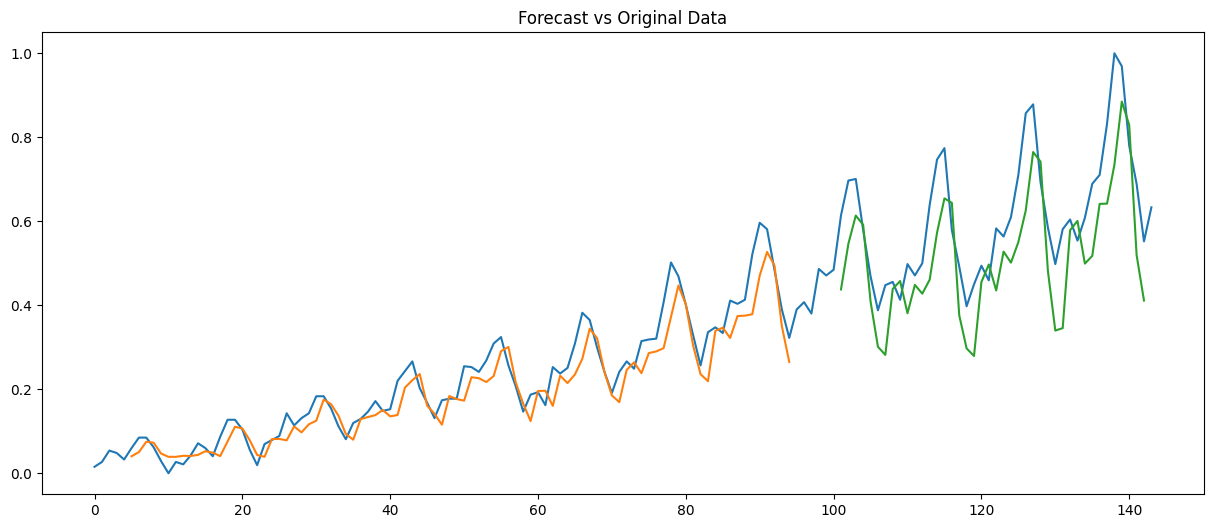

In [65]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Forecast vs Original Data')
plt.show()